# Predicting UK Equipment / Resources at Percentages of GDP

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## Load Datasets

In [ ]:
vessels_df = pd.read_excel('UK_armed_forces_equipment_and_formations_2024.xlsx', 'Table 1', skiprows=7)
vessels_df.head(5)

,Fleet and Vessel type,2016\nIn Service,2016\nTotal,2017\nIn Service,2017\nTotal,2018\nIn Service,2018\nTotal,2019\nIn Service,2019\nTotal,2020\nIn Service,2020\nTotal,2021\nIn Service,2021\nTotal,2022\nIn Service,2022\nTotal,2023 In Service,2023 Total,2024 In Service,2024 \nTotal,Notes
0,Royal Navy Submarine Service,11,11,11,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,NaN
1,Ballistic Nuclear Submarine,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,NaN
2,Nuclear Submarine,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,NaN
3,Royal Navy Surface Fleet,64,64,64,64,60,60,60,60,66,67,63,63,62,62,59,59,57,57,"[r] refers to K12, L12 and M12"
4,Aircraft Carriers,[x],[x],[x],[x],1,1,1,1,2,2,2,2,2,2,2,2,2,2,NaN


In [13]:
land_equipment_df = pd.read_excel('UK_armed_forces_equipment_and_formations_2024.xlsx', 'Table 5', skiprows=6)
land_equipment_df.head(5)

,Platform type and platform,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Combat Equipment [Note 5],4129,4098,4094,4093,4071,3985,3640,3207,3316
1,Armoured Fighting Vehicles,1198,1197,1197,1197,1175,1192,1139,882,960
2,Challenger 2 Main Battle Tank,227,227,227,227,227,227,227,213,219
3,CVR(T) Scimitar,201,201,201,201,181,179,170,[x],[x]
4,Ajax,[x],[x],[x],[x],[x],19,21,44,128


In [15]:
aircraft_df = pd.read_excel('UK_armed_forces_equipment_and_formations_2024.xlsx', 'Table 7', skiprows=7)
aircraft_df.head(5)

,Platform Type,2016\nIn Service,2016\nTotal,2017\nIn Service,2017\nTotal,2018\nIn Service,2018\nTotal,2019\nIn Service,2019\nTotal,2020\nIn Service,2020\nTotal,2021\nIn Service,2021\nTotal,2022\nIn Service,2022\nTotal,2023\nIn Service,2023\nTotal,2024 \nIn Service,2024\nTotal,Notes
0,Fixed wing Platforms,310,724,309,714,330,646,309,601,276,534,304,560,278,556,308,564,289,556,"[r] applies to H9, K9 and M9"
1,A400M,7,7,9,15,19,19,20,20,20,20,20,20,20,20,21,21,22,22,NaN
2,Airseeker,2,2,2,2,2,3,3,3,2,3,2,3,2,3,3,3,3,3,NaN
3,Avenger [Note 9],[x],4,[x],4,[x],4,4,4,4,4,4,4,4,4,4,4,2,4,NaN
4,BAE 146,4,4,3,4,4,4,4,4,4,4,4,4,0,0,0,0,0,0,NaN


In [17]:
rotor_df = pd.read_excel('UK_armed_forces_equipment_and_formations_2024.xlsx', 'Table 8', skiprows=7)
rotor_df.head(5)

,Platform Type,2016\nIn Service,2016\nTotal,2017\nIn Service,2017\nTotal,2018\nIn Service,2018\nTotal,2019\nIn Service,2019\nTotal,2020\nIn Service,2020\nTotal,2021\nIn Service,2021\nTotal,2022\nIn Service,2022\nTotal,2023\nIn Service,2023\nTotal,2024 \nIn Service,2024\nTotal,Notes
0,Rotary-wing Platforms,241,372,227,353,211,332,207,325,214,311,193,303,184,291,193,294,184,268,"[r] applies to L9, M9, N9 and O9"
1,Apache Mk1,32,50,42,50,42,50,42,50,40,42,28,30,18,20,14,16,0,0,NaN
2,Apache AH-64E,0,0,0,0,0,0,0,0,0,0,0,0,4,16,27,31,37,38,[r] applies to N11 and O11
3,AW109SP,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,NaN
4,Bell 212,3,5,5,5,5,5,5,5,5,5,5,5,3,3,0,0,0,0,NaN


## Graphs

Three scenarios modelling optimistic, linear, and pessimistic equipment growth.

### Optimistic

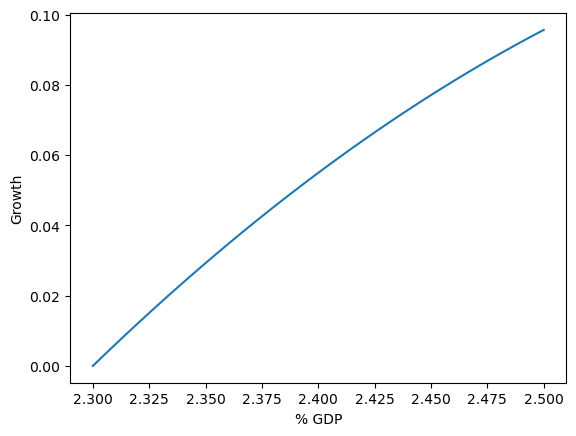

In [156]:
percentage_increase = 0.087 * 1.1 # Artificially increased by 10%

x = [2.3, 2.4, 2.5]
y = [0, 0.055, percentage_increase]

optim_f = interp1d(x, y, kind='quadratic')
optim_x = np.linspace(2.3, 2.5, 100)
optim_y = optim_f(optim_x)

plt.plot(optim_x, optim_y)
plt.xlabel(f'% GDP')
plt.ylabel('Growth')
plt.show()

### Linear

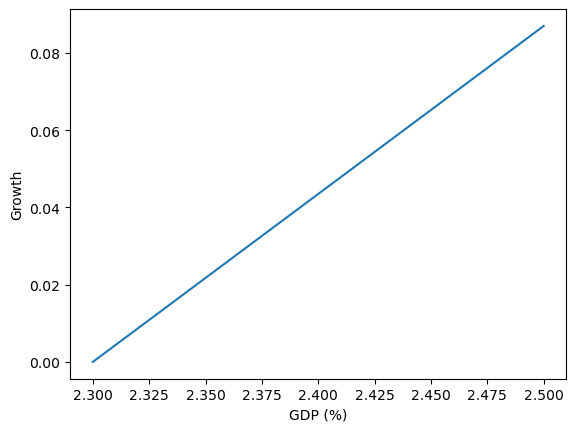

In [154]:
percentage_increase = 0.087
period = 0.2

m = (percentage_increase / period)
c = -2.3

linear_x = np.linspace(2.3, 2.5, 100)
linear_y = m * (linear_x + c)

plt.plot(linear_x, linear_y)
plt.xlabel('GDP (%)')
plt.ylabel('Growth')
plt.show()

### Pessimistic

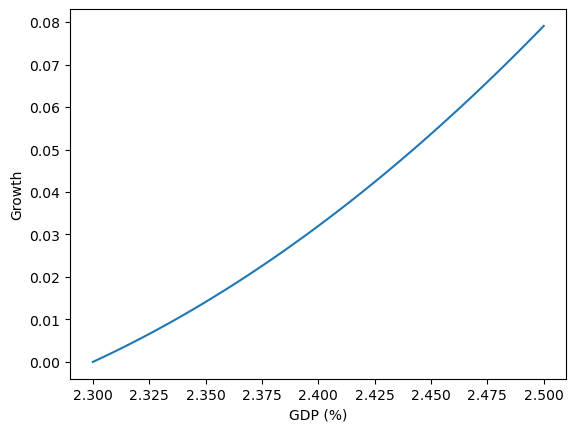

In [157]:
percentage_increase = 0.087 / 1.1 # Artificially decreased by 10%
period = 0.2

x = [2.3, 2.4, 2.5]
y = [0, 0.032, percentage_increase]

pessim_f = interp1d(x, y, kind='quadratic')
pessim_x = np.linspace(2.3, 2.5, 100)
pessim_y = pessim_f(pessim_x)

plt.plot(pessim_x, pessim_y)
plt.xlabel(f'GDP (%)')
plt.ylabel('Growth')
plt.show()

### Combined

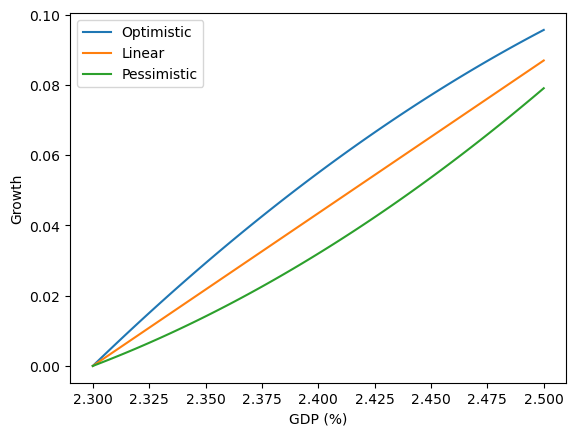

In [151]:
fig, ax = plt.subplots()

ax.plot(optim_x, optim_y, label='Optimistic')
ax.plot(linear_x, linear_y, label='Linear')
ax.plot(pessim_x, pessim_y, label='Pessimistic')

ax.set_xlabel(f'GDP (%)')
ax.set_ylabel('Growth')
ax.legend()
plt.show()

## Calculation